<a href="https://colab.research.google.com/github/Aravinda89/emotion/blob/main/Emotion_Recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Emotion Classification

!pip install fastai==2.0.15
!pip install fastai2==0.0.30
!pip install fastcore==1.0.16
!pip install fastai --upgrade

from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

     |████████████████████████████████| 185 kB 6.4 MB/s 
     |████████████████████████████████| 56 kB 2.4 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 179 kB 5.4 MB/s 
     |████████████████████████████████| 40 kB 3.5 MB/s 
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.3.27
    Uninstalling fastcore-1.3.27:
      Successfully uninstalled fastcore-1.3.27
     |████████████████████████████████| 189 kB 5.3 MB/s 
  Using cached fastcore-1.3.27-py3-none-any.whl (56 kB)
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.0.16
    Uninstalling fastcore-1.0.16:
      Successfully uninstalled fastcore-1.0.16
  Attempting uninstall: fastai
    Found existing installation: fastai 2.0.15
    Uninstalling fastai-2.0.15:
      Successfully uninstalled fastai-2.0.15
Mounted at /content/gdriv

In [2]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

import numpy as np
from fastcore.xtras import Path # @patch'd properties to the Pathlib module

from fastai.callback.fp16 import to_fp16
from fastai.callback.schedule import fit_one_cycle, lr_find 

from fastai.data.block import CategoryBlock, DataBlock
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import get_image_files, Normalize, RandomSplitter, RegexLabeller

from fastai.interpret import ClassificationInterpretation
from fastai.learner import Learner # imports @patch'd properties to Learner including `save`, `load`, `freeze`, and `unfreeze`

from fastai.metrics import error_rate

from fastai.vision.augment import aug_transforms, RandomResizedCrop
from fastai.vision.core import imagenet_stats
from fastai.vision.data import ImageDataLoaders, ImageBlock
from fastai.vision.learner import cnn_learner

from torchvision.models.resnet import resnet34, resnet50

import glob
import os
import random
from shutil import copyfile

In [ ]:
ls

In [ ]:
pwd

'/root'

In [ ]:
# cp -r train/* test/

In [ ]:
# classes = os.listdir('./train')
# classes

In [ ]:
# ls /train/surprise

In [ ]:
# for cls in classes:
#   dir_imgs = glob.glob('../validation/'+cls+'/*.jpg')
#   print(cls, len(dir_imgs))
#   random.shuffle(dir_imgs)

#   choose_imgs = dir_imgs[:100]
#   print(cls, len(choose_imgs))

#   for im in choose_imgs:
#     copyfile(im, './test/'+cls+'/'+im.split('/')[-1])

In [3]:
ls gdrive/MyDrive

 2.model_development.gslides
 3_car_type.gslides
 3_car_type_new.gslides
'Aravinda Gayan - Intro to Machine Learning.png'
 Aravinda_Gayan.pdf
'Aravinda Gayan - Python.png'
 Aravinda_Gayan_resume_ENG.docx
 Aravinda_Gayan_resume_final.docx
 Aravinda_Gayan_resume_finall.pdf
 audio_book/
'certificate (1).pdf'
'certificate (2).pdf'
'certificate (3).pdf'
'certificate (4).pdf'
'certificate (5).pdf'
'certificate (6).pdf'
'CertificateOfCompletion_Docker for Data Scientists (1).pdf'
 certificate-of-completion-for-git-and-github.pdf
'CertificateOfCompletion_Introduction to Deep Learning with OpenCV.pdf'
'CertificateOfCompletion_Python_ Decorators.pdf'
 certificate.pdf
 certificates/
 CH/
'Colab Notebooks'/
'Consulting proposal.gslides'
 Course_application.gdoc
 CP/
 CV/
 data/
 Data_Scientist_resume.docx
 DataSets/
 Deep_Learning_AndrewNG/
 download.pdf
 fastai/
'Gayan PDF.pdf'
 GTV/
 hsk5/
 models/
 msc/
 MSC_final_thesis/
 MSC_FINAL_THESIS/
 MX-3118NC_20180629_114414-rotated.pdf
'New Map.xmind'

In [3]:
path_train = '/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train'
path_test = '/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/test'

In [4]:
train_imgs = glob.glob(path_train+'/*/*.jpg')

In [5]:
len(train_imgs)

2127

In [6]:
test_imgs = glob.glob(path_test+'/*/*.jpg')

In [8]:
len(test_imgs)

700

In [7]:
path = Path(path_train)
path

Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train')

In [8]:
path.ls()

(#7) [Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/surprise'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/sad'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/neutral'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/happy'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/fear'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/disgust'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/angry')]

In [9]:
fns = get_image_files(path)
len(fns)

2127

In [10]:
fns[:3]

(#3) [Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/surprise/6019.jpg'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/surprise/28032.jpg'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/surprise/4828.jpg')]

/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/disgust/29630.jpg


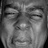

In [11]:
fname = random.choice(list(fns))
print(fname)
im = Image.open(fname)
im

In [12]:
im.shape

(48, 48)

In [13]:
emotion_dblk = DataBlock(
                          blocks=(ImageBlock, CategoryBlock), 
                          get_items=get_image_files, 
                          splitter=RandomSplitter(valid_pct=0.2, seed=42),
                          get_y=parent_label,
                          item_tfms=Resize(48) )

In [14]:
emotion_dblks = emotion_dblk.new(item_tfms=Resize(48, ResizeMethod.Squish))
# cars = cars.new(item_tfms=Resize(224, ResizeMethod.Squish), batch_tfms=aug_transforms(mult=2))
dls = emotion_dblks.dataloaders(path)

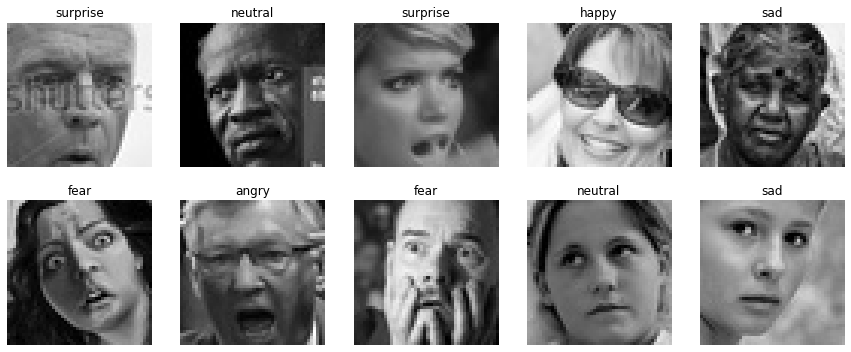

In [15]:
dls.train.show_batch(max_n=10, nrows=2, unique=False)

In [16]:
dls.vocab

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

SuggestedLRs(valley=0.0008317637839354575)

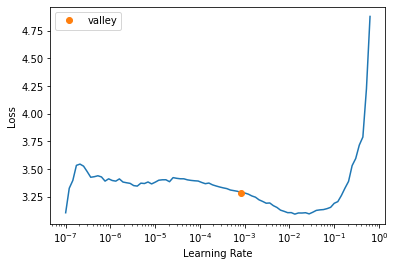

In [18]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate, accuracy])
learn.lr_find()

In [19]:
learn.fit_one_cycle(5, 0.0008317637839354575)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.202383,2.307491,0.851765,0.148235,00:35
1,2.850196,2.246337,0.809412,0.190588,00:13
2,2.522110,2.205090,0.757647,0.242353,00:13
3,2.253185,2.224819,0.760000,0.240000,00:13
4,2.066093,2.212305,0.760000,0.240000,00:13


In [32]:
learn.save('/content/gdrive/MyDrive/models/Emotion_recog_stage-1')

Path('/content/gdrive/MyDrive/models/Emotion_recog_stage-1.pth')

SuggestedLRs(valley=6.30957365501672e-05)

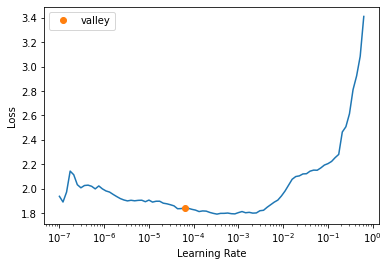

In [33]:
learn.unfreeze()
learn.lr_find()

In [34]:
learn.fit_one_cycle(5, 6.30957365501672e-05)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.832607,2.182757,0.722353,0.277647,00:13
1,1.740187,2.089725,0.715294,0.284706,00:13
2,1.511955,2.049859,0.705882,0.294118,00:13
3,1.301255,2.017128,0.682353,0.317647,00:13
4,1.164433,2.016698,0.691765,0.308235,00:13


In [35]:
learn.fit_one_cycle(5, 6.30957365501672e-05)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.913496,2.028824,0.687059,0.312941,00:14
1,0.838935,2.053790,0.672941,0.327059,00:13
2,0.747163,2.102056,0.682353,0.317647,00:13
3,0.644233,2.117464,0.677647,0.322353,00:13
4,0.573875,2.102574,0.665882,0.334118,00:13


In [36]:
interp = ClassificationInterpretation.from_learner(learn)

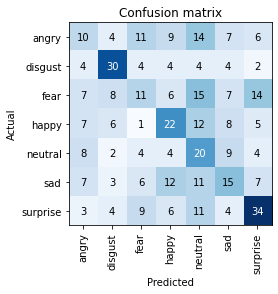

In [37]:
interp.plot_confusion_matrix()

In [38]:
learn.save('/content/gdrive/MyDrive/models/Emotion_recog_stage-2')

Path('/content/gdrive/MyDrive/models/Emotion_recog_stage-2.pth')

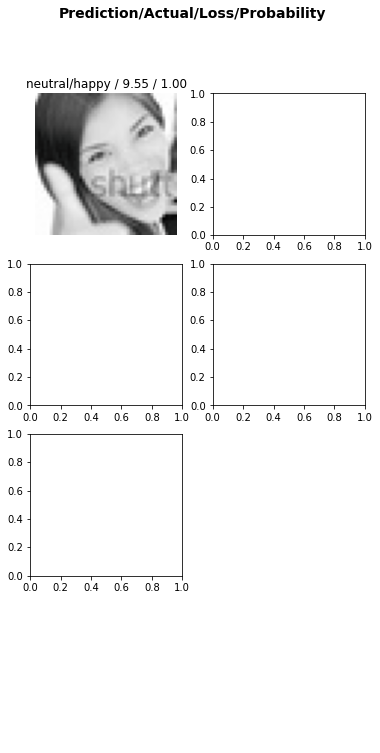

In [41]:
interp.plot_top_losses(5, nrows=4)

In [47]:
emotion_dblks = emotion_dblk.new(item_tfms=Resize(48, ResizeMethod.Squish))
dls = emotion_dblks.dataloaders(path)

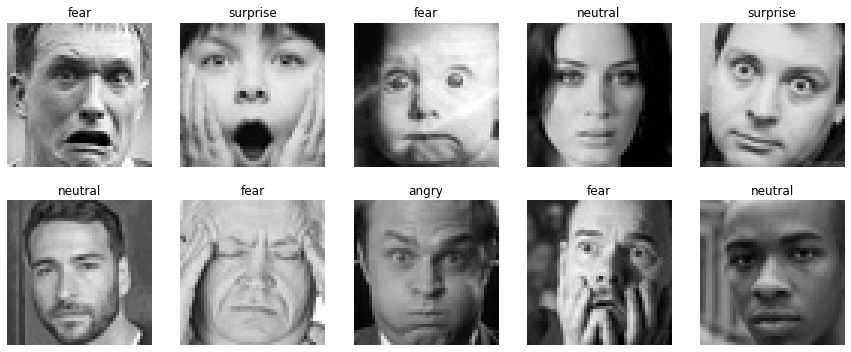

In [49]:
dls.train.show_batch(max_n=10, nrows=2, unique=False)

SuggestedLRs(valley=0.0002290867705596611)

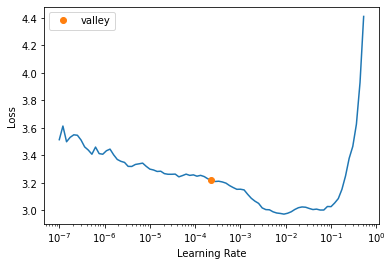

In [51]:
learn = cnn_learner(dls, resnet50, metrics=[error_rate, accuracy])
learn.lr_find()

In [52]:
learn.fit_one_cycle(5, 0.0002290867705596611)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.185287,2.203311,0.809412,0.190588,00:14
1,2.850157,2.111650,0.745882,0.254118,00:14
2,2.534477,2.080235,0.682353,0.317647,00:14
3,2.305699,2.043525,0.691765,0.308235,00:14
4,2.147217,2.053559,0.689412,0.310588,00:14


In [53]:
learn.fit_one_cycle(5, 0.0002290867705596611)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.937749,2.085492,0.680000,0.320000,00:15
1,1.940750,2.204487,0.712941,0.287059,00:14
2,1.819530,2.197897,0.701176,0.298824,00:14
3,1.693067,2.242846,0.708235,0.291765,00:14
4,1.593729,2.211124,0.710588,0.289412,00:14


SuggestedLRs(valley=5.248074739938602e-05)

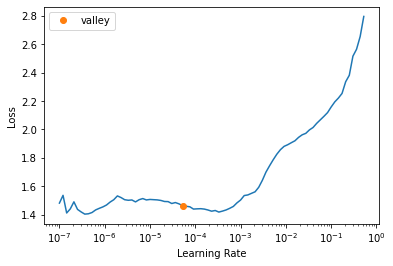

In [54]:
learn.unfreeze()
learn.lr_find()

In [55]:
learn.fit_one_cycle(5, 5.248074739938602e-05)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.426398,2.179926,0.672941,0.327059,00:15
1,1.378288,2.207163,0.661176,0.338824,00:14
2,1.210865,2.202078,0.684706,0.315294,00:14
3,0.987716,2.172266,0.675294,0.324706,00:14
4,0.844869,2.155433,0.672941,0.327059,00:14


In [56]:
learn.fit_one_cycle(5, 5.248074739938602e-05)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.626058,2.197091,0.680000,0.320000,00:15
1,0.561630,2.289153,0.651765,0.348235,00:14
2,0.459813,2.289257,0.672941,0.327059,00:14
3,0.379112,2.340427,0.668235,0.331765,00:14
4,0.305441,2.339923,0.665882,0.334118,00:14


In [57]:
interp = ClassificationInterpretation.from_learner(learn)

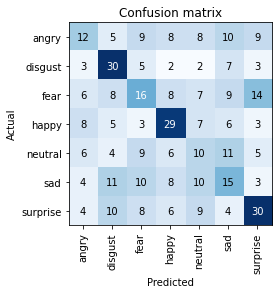

In [58]:
interp.plot_confusion_matrix()

In [59]:
emotion_dblks = emotion_dblk.new(item_tfms=Resize(48, ResizeMethod.Squish), batch_tfms=aug_transforms(mult=2))
dls = emotion_dblks.dataloaders(path)

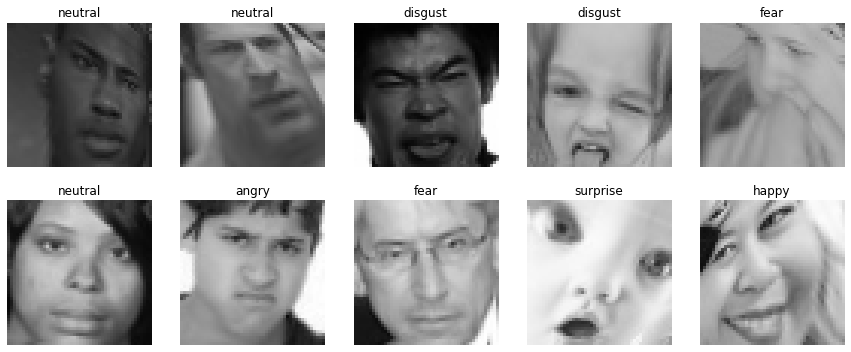

In [60]:
dls.train.show_batch(max_n=10, nrows=2, unique=False)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0010000000474974513)

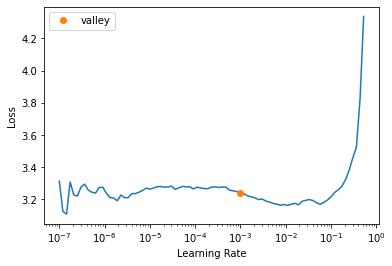

In [61]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])
learn.lr_find()

In [62]:
learn.fit_one_cycle(5, 0.0010000000474974513)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.155716,2.408965,0.807059,0.192941,00:15
1,2.967613,2.219811,0.790588,0.209412,00:14
2,2.814485,2.175303,0.781176,0.218824,00:14
3,2.697113,2.161469,0.762353,0.237647,00:14
4,2.661009,2.148471,0.762353,0.237647,00:14


In [63]:
learn.fit_one_cycle(5, 0.0010000000474974513)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.504634,2.082398,0.748235,0.251765,00:14
1,2.464010,2.113097,0.769412,0.230588,00:14
2,2.403836,2.039714,0.741176,0.258824,00:14
3,2.367544,2.031931,0.734118,0.265882,00:16
4,2.342842,1.998006,0.736471,0.263529,00:14


SuggestedLRs(valley=0.0005754399462603033)

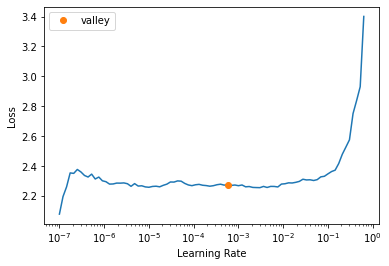

In [64]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 0.0005754399462603033)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.319646,3.541799,0.738824,0.261176,00:15
